In [ ]:
 #Random Forest Classifier

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the datasets

df = pd.read_csv('pogoda_pv.csv')
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.drop('Unnamed: 14', axis= 1, inplace=True)
df['Power'] = df['pv_voltage'] * df['pv_current'] 
weather_features = ['solar_radiation', 'temperature', 'wind_speed', 'wind_dir', 'humidity', 'air_pressure']

# Set the variable X to be all our input columns
X = df[weather_features]

# set y to be our output column
Y = df.Power





R2 score: 0.957725054502929


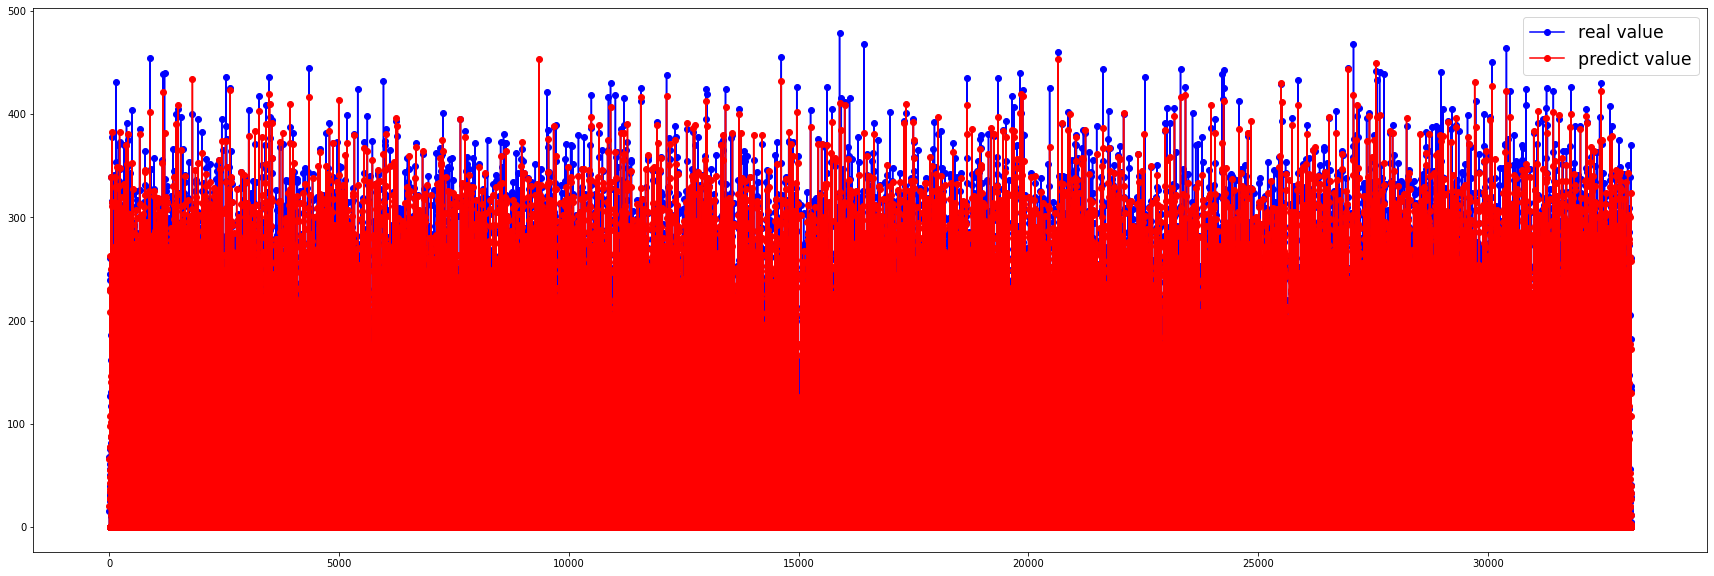

In [6]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.fit_transform(X_Test)

# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 200,  random_state = 1)
model.fit(X_Train,Y_Train)
Y_pred=model.predict(X_Test)
# Predicting the test set results

Y_pred

print ("R2 score: " + str(model.score(X_Test, Y_Test)))
plt.figure(figsize=(30, 10))
real_res, = plt.plot(np.arange(0, len(Y_Test)), Y_Test, 'bo-', label = 'real value')
predict_res, = plt.plot(np.arange(0, len(Y_pred)), Y_pred, 'ro-', label = 'predict value')
plt.legend(handles=[real_res, predict_res], fontsize='xx-large')
plt.show()